# Les K plus proches voisins & Arbres de décision 

## Partie I: K plus proches voisins (KNN : k nearest neighbors)

##A. Algorithme
Le KNN est un algorithme de classification supervisé. Pour chaque entrée $x_{i}=(x^{1}_{i}, x^{1}_{i}, x^{2}_{i}, ... x^{n}_{i}) $ il faut disposer de la sortie $y_{i}$ correspondante (la classe correspondante)

Pour savoir à quelle classe $y_{i}$ un vecteur x apartient il faut:
- Calculer la distance (euclidienne) du vecteur x à tous les examples $x_{i}$
- trouver les k exemple les plus proche de x
- x appartient à la classe majoritairement representé par ces k éléments 

####Q1. utilisez la fonction ***make_blobs(n_samples,centers, cluster_std,random_state)*** du module ***sklearn.datasets*** pour generer trois classes puis visualiser ces trois classe comme suivants:
*   rouge: y=0
*   blue: y=1
*   vert: y=2
*   Orange: y=3
l'argument ***cluster_std*** affecte le chevauchement entre les classe

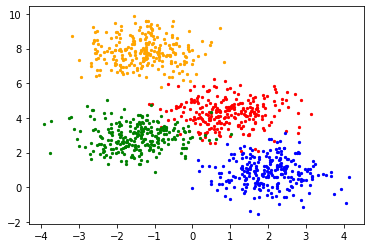

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

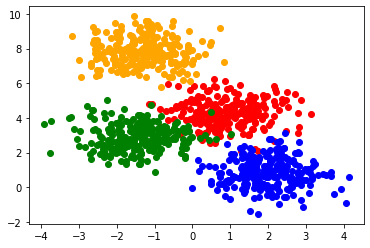

In [9]:
& , y = make_blobs(n_samples = 1000 , centers = 4 , cluster_std = 0.8, random_state=0)

colors = ['red' ,'blue' ,'green' ,'orange']
for k,col in enumerate(colors):
    data= y == k
    plt.scatter(X[data,0] , X[data,1] ,c=col)

####Q2. Ecrire une fonction knn(x,X_train,y_train,k) pour predire la classe de x avec l'algorithme du kNN 

In [12]:
from math import sqrt
import pandas as pd

In [10]:
def EuclidienneDistance(x, X_train):
    d=[]
    for elm in X_train:
        d.append(sqrt( ((x[0]-elm[0])**2) + ((x[1]-elm[1])**2) ) )
    return d

In [160]:
def knn(x , X_train , y_train , k):
    neighbours=[]
    aux={}
    distance= EuclidienneDistance(x , X_train)
    
    df = pd.DataFrame({"X1":X_train[:,0] , "X2":X_train[:,1] , "y":y_train , 
                       "distance":distance}).sort_values(by="distance" )
    
    for i in range(k):
        neighbours.append(list(df["y"])[i])
    for e in set(neighbours):
        aux[e]=neighbours.count(e)
    for e in aux:
        if aux[e]==max(aux.values()):
            return e
            break
                         

####Q3. A quelle classe apartient les trois points suivants: x1=(-2,5); x2(-1,6) et x3=(0,2) pour k=3,5 et 7 respectivement

In [161]:
import numpy as np
classes={0:"rouge" , 1:"bleu" , 2:"vert" , 3:"orange"}
x1 = [-2,5]
x2 = [-1,6]
x3 = [0,2]

classe1_1=knn(x1,X,y,3)
classe1_2=knn(x1,X,y,5)
classe1_3=knn(x1,X,y,7)

print("classe x1 , k=3: ",classe1_1,"==>",classes[classe1_1])
print("classe x1 , k=5: ",classe1_2,"==>",classes[classe1_2])
print("classe x1 , k=7: ",classe1_3,"==>",classes[classe1_3])
print("-------------------------------")
classe2_1=knn(x2,X,y,3)
classe2_2=knn(x2,X,y,5)
classe2_3=knn(x2,X,y,7)

print("classe x2 , k=3: ",classe2_1,"==>",classes[classe2_1])
print("classe x2 , k=5: ",classe2_2,"==>",classes[classe2_2])
print("classe x2 , k=7: ",classe2_3,"==>",classes[classe2_3])
print("-------------------------------")
classe3_1=knn(x3,X,y,3)
classe3_2=knn(x3,X,y,5)
classe3_3=knn(x3,X,y,7)

print("classe x3 , k=3: ",classe3_1,"==>",classes[classe3_1])
print("classe x3 , k=5: ",classe3_2,"==>",classes[classe3_2])
print("classe x3 , k=7: ",classe3_3,"==>",classes[classe3_3])

classe x1 , k=3:  2 ==> vert
classe x1 , k=5:  2 ==> vert
classe x1 , k=7:  2 ==> vert
-------------------------------
classe x2 , k=3:  3 ==> orange
classe x2 , k=5:  3 ==> orange
classe x2 , k=7:  3 ==> orange
-------------------------------
classe x3 , k=3:  2 ==> vert
classe x3 , k=5:  2 ==> vert
classe x3 , k=7:  2 ==> vert


##B. Utilisation des modules python
Le module ***KNeighborsClassifier*** de ***sklearn.neighbors*** permet de initialiser un modele kNN avec un parametre k ***KNeighborsClassifier(k)*** en entraine ce modele avce la sa méthode ***fit(x_train,y_train)*** puis la prediction avec sa methode ***predict(x)***
####Q1. Utiliser 75% des données precedentes pour entrainer ce modèle puis afficher la matrice de confusion et la precision de ce modèle pour k=1, 3, 5 ... 11
Utiliser la méthode accuracy_score(y_test, y_pred) de sklearn.metrics pour calculer la precision (accuracy) du modèle

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train , X_test , y_train,y_test = train_test_split(X,y,train_size=0.75,test_size=0.25)

k = [1,3,5,7,9,11]
predictions=[]
for e in k:
    modelknn=KNeighborsClassifier(e).fit(X_train,y_train)
    predictions.append(modelknn.predict(X_test))
for i in range(len(predictions)):
    data=pd.DataFrame({"expected":y_test , "got":predictions[i]})
    data.index.name='pour k={}'.format(k[i])
    print(data)
    print('--------------------\n')

          expected  got
pour k=1               
0                0    0
1                0    0
2                2    2
3                2    0
4                0    0
...            ...  ...
245              3    3
246              3    3
247              2    2
248              3    3
249              1    1

[250 rows x 2 columns]
--------------------

          expected  got
pour k=3               
0                0    0
1                0    0
2                2    2
3                2    2
4                0    0
...            ...  ...
245              3    3
246              3    3
247              2    2
248              3    3
249              1    1

[250 rows x 2 columns]
--------------------

          expected  got
pour k=5               
0                0    0
1                0    0
2                2    2
3                2    2
4                0    0
...            ...  ...
245              3    3
246              3    3
247              2    2
248              3  

In [163]:
# matrice de confusion et la precision de ce modèle pour k=1, 3, 5 ... 11 
# Utiliser la méthode accuracy_score(y_test, y_pred) de sklearn.metrics pour 
# calculer la precision (accuracy) du modèle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=[]
accuracy=[]
for i in range(len(predictions)):
    cm.append(confusion_matrix(y_test,predictions[i]))
    print("Matrice de confusion pour k={}:\n{}\n".format(k[i],cm[i]))
    accuracy.append(accuracy_score(y_test, predictions[i]))
    print("accuracy (pour k={}): {}".format(k[i],accuracy[i]))
    print('\n--------------------------------------')

Matrice de confusion pour k=1:
[[54  1  3  0]
 [ 1 65  1  0]
 [ 7  0 52  0]
 [ 0  0  0 66]]

accuracy (pour k=1): 0.948

--------------------------------------
Matrice de confusion pour k=3:
[[57  1  0  0]
 [ 0 66  1  0]
 [ 7  0 52  0]
 [ 0  0  0 66]]

accuracy (pour k=3): 0.964

--------------------------------------
Matrice de confusion pour k=5:
[[56  2  0  0]
 [ 0 66  1  0]
 [ 7  0 52  0]
 [ 0  0  0 66]]

accuracy (pour k=5): 0.96

--------------------------------------
Matrice de confusion pour k=7:
[[56  2  0  0]
 [ 0 66  1  0]
 [ 7  0 52  0]
 [ 0  0  0 66]]

accuracy (pour k=7): 0.96

--------------------------------------
Matrice de confusion pour k=9:
[[56  2  0  0]
 [ 0 66  1  0]
 [ 7  0 52  0]
 [ 0  0  0 66]]

accuracy (pour k=9): 0.96

--------------------------------------
Matrice de confusion pour k=11:
[[56  2  0  0]
 [ 0 66  1  0]
 [ 7  0 52  0]
 [ 0  0  0 66]]

accuracy (pour k=11): 0.96

--------------------------------------


####Q2. Trace la precision de ce modele en fonction de k. quel valeur de k choisir pour ce problème?



meilleure k =  3


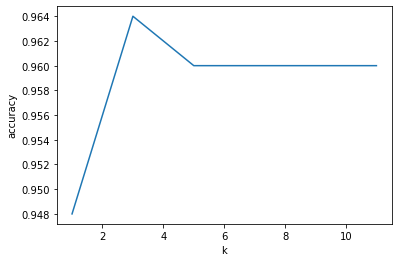

In [164]:
plt.plot(k,accuracy)
plt.xlabel('k')
plt.ylabel('accuracy')
#quel valeur de k choisir pour ce problème?
print("meilleure k = ",k[accuracy.index(max(accuracy))])